In [1]:
import pandas
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [113]:
##### Solo hay que modificar estos dos parámetros  #####
test = 5     # test number
simu = 1     # number of simulations

#####################################################
path_folder = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_" + str(test) + "/simu_fail_" + str(simu) + "/"
path_folder

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_5/simu_fail_1/'

In [114]:
#amcl_hybrid = path_folder + "amcl_hybrid"
amcl_RGB = path_folder + "amcl_marker"
#amcl_laser = path_folder + "amcl_laser"
type_file =".txt"

#amcl_hybrid_result = amcl_hybrid + type_file
amcl_RGB_result = amcl_RGB + type_file
#amcl_laser_result = amcl_laser + type_file

#amcl_hybrid_numMarker = amcl_hybrid + "_num_markers" + type_file
amcl_RGB_numMarker = amcl_RGB + "_num_markers" + type_file
#amcl_laser_numMarker = amcl_laser + "_num_markers" + type_file

#amcl_hybrid_numParticles = amcl_hybrid + "_num_particles" + type_file
amcl_RGB_numParticles = amcl_RGB + "_num_particles" + type_file
#amcl_laser_numParticles = amcl_laser + "_num_particles" + type_file

#amcl_hybrid_ATR = amcl_hybrid + "_ATR" + type_file
amcl_RGB_ATR = amcl_RGB + "_ATR" + type_file
#amcl_laser_ATR = amcl_laser + "_ATR" + type_file


In [115]:
#data_amcl_hybrid_result = pandas.read_csv(amcl_hybrid_result, skipinitialspace = True)
data_amcl_RGB_result = pandas.read_csv(amcl_RGB_result, skipinitialspace = True)
#data_amcl_laser_result = pandas.read_csv(amcl_laser_result, skipinitialspace = True)

#data_amcl_hybrid_numMarker = pandas.read_csv(amcl_hybrid_numMarker, skipinitialspace = True, dtype = {"Num Markers" : "int64"})
data_amcl_RGB_numMarker = pandas.read_csv(amcl_RGB_numMarker, skipinitialspace = True)
#data_amcl_laser_numMarker = pandas.read_csv(amcl_laser_numMarker, skipinitialspace = True)

#data_amcl_hybrid_numParticles = pandas.read_csv(amcl_hybrid_numParticles, skipinitialspace = True)
data_amcl_RGB_numParticles = pandas.read_csv(amcl_RGB_numParticles, skipinitialspace = True)
#data_amcl_laser_numParticles = pandas.read_csv(amcl_laser_numParticles, skipinitialspace = True)

#data_amcl_hybrid_ATR = pandas.read_csv(amcl_hybrid_ATR, skipinitialspace = True)
data_amcl_RGB_ATR = pandas.read_csv(amcl_RGB_ATR, skipinitialspace = True)
#data_amcl_laser_ATR = pandas.read_csv(amcl_laser_ATR, skipinitialspace = True)


In [116]:
countMin = 30
line_width = 1
min_numMarker = -1
max_numMarker = 4
max_time = data_amcl_RGB_result["Time"][len(data_amcl_RGB_result["Time"]) - 1]
max_time
sizeCircle = 0.3
coloNumMarker = (1, 0, 1, 0.5)

In [117]:
data_amcl_RGB_result.head()

,Time,X position error,Y position error,Distance error,YAW error,X deviation,Y deviation
0,1.051,0.024175,-0.034842,0.042408,0.135178,0.464374,0.462846
1,1.706,0.081746,-0.031181,0.087491,-0.087196,0.449478,0.413737
2,2.419,0.059483,-0.057648,0.082834,0.204295,0.446571,0.386772
3,2.948,0.072357,-0.095159,0.119544,-0.198812,0.463339,0.361593
4,3.644,0.063108,-0.107752,0.124873,0.024841,0.415233,0.302395


In [118]:
data_numMarker = list(data_amcl_RGB_numMarker["Num Markers"])
value = 0
value_save = 0
count = 0
for i in range(len(data_numMarker)):
    if data_numMarker[i] >= value_save:
        value_save = data_numMarker[i]
        count = 0
    else:
        count+=1
        if count > countMin:
            value_save = data_numMarker[i]
        else:
            data_numMarker[i] = value_save
#data_numMarker

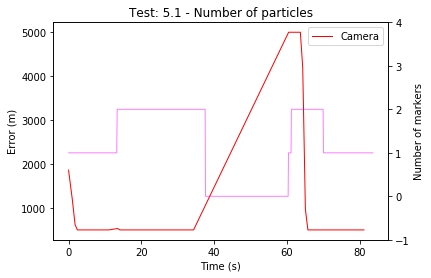

In [119]:
#plt.plot(data_amcl_laser_numParticles["Time"],data_amcl_laser_numParticles["Num Particles"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_numParticles["Time"],data_amcl_RGB_numParticles["Num Particles"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_numParticles["Time"],data_amcl_hybrid_numParticles["Num Particles"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Test: " + str(test) + "." + str(simu) + " - Number of particles")
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.savefig(path_folder + "g_NumParticles.png")

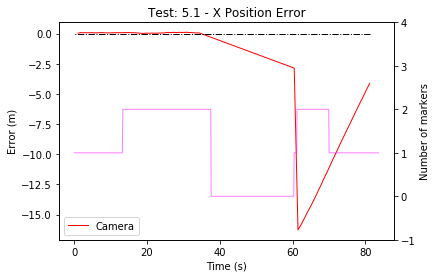

In [120]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["X position error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["X position error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["X position error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Test: " + str(test) + "." + str(simu) + " - X Position Error")
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.savefig(path_folder + "g_error_X_position.png")

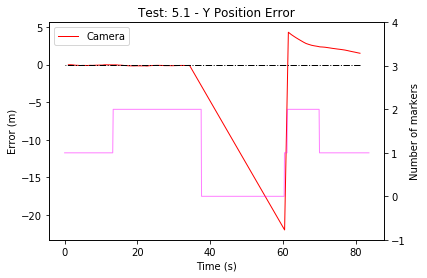

In [121]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Y position error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Y position error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Y position error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
#plt2.legend(loc = 9)
plt.ylabel("Number of markers")
plt.title("Test: " + str(test) + "." + str(simu) + " - Y Position Error")
plt.savefig(path_folder + "g_error_Y_position.png")

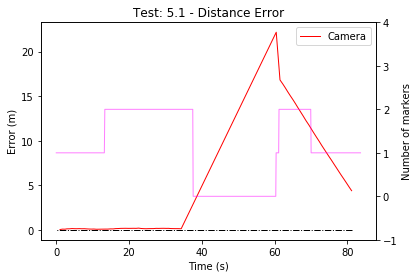

In [122]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Distance error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Distance error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Distance error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
plt.title("Test: " + str(test) + "." + str(simu) + " - Distance Error")
plt.savefig(path_folder + "g_error_Distance_position.png")

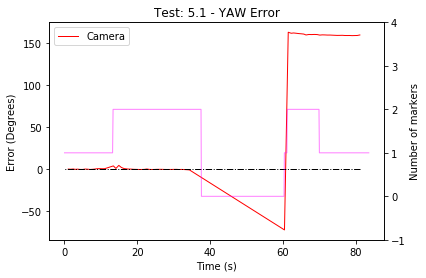

In [123]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["YAW error"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["YAW error"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["YAW error"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.plot([max_time, 0 ], [0, 0], color = (0,0,0), linewidth = line_width, linestyle = "-.")
plt.ylabel("Error (Degrees)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
plt.title("Test: " + str(test) + "." + str(simu) + " - YAW Error")
plt.savefig(path_folder + "g_error_YAW_position.png")

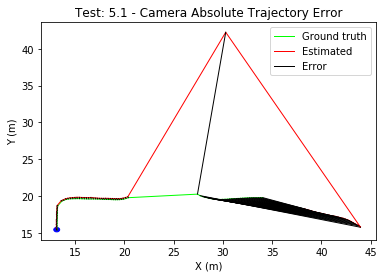

In [124]:
numEnd = 1
plt.plot(data_amcl_RGB_ATR["X_gazebo"], data_amcl_RGB_ATR["Y_gazebo"], label='Ground truth', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_ATR["X_amcl"], data_amcl_RGB_ATR["Y_amcl"], label='Estimated', color = (1, 0, 0), linewidth = line_width)
plt.plot([data_amcl_RGB_ATR["X_gazebo"][0],data_amcl_RGB_ATR["X_amcl"][0]],[data_amcl_RGB_ATR["Y_gazebo"][0],data_amcl_RGB_ATR["Y_amcl"][0]], label= 'Error', color = (0,0,0), linewidth = line_width)
for i in range(len(data_amcl_RGB_ATR["X_gazebo"])):
    plt.plot([data_amcl_RGB_ATR["X_gazebo"][i],data_amcl_RGB_ATR["X_amcl"][i]],[data_amcl_RGB_ATR["Y_gazebo"][i],data_amcl_RGB_ATR["Y_amcl"][i]], color = (0,0,0), linewidth = line_width)
plt.ylabel("Y (m)")
plt.xlabel("X (m)")
circleIni = plt.Circle((data_amcl_RGB_ATR["X_amcl"][0],data_amcl_RGB_ATR["Y_amcl"][0]), sizeCircle, color = (0, 0, 1))
plt.gcf().gca().add_artist(circleIni)
plt.legend()
plt.title("Test: " + str(test) + "." + str(simu) + " - Camera Absolute Trajectory Error")
plt.savefig(path_folder + "g_zCamera_ATR.png")

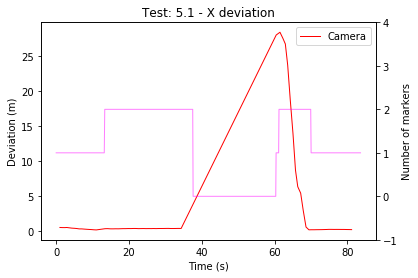

In [125]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["X deviation"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["X deviation"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["X deviation"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Deviation (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
#plt2.legend(loc = 9)
plt.title("Test: " + str(test) + "." + str(simu) + " - X deviation")
plt.savefig(path_folder + "g_X_deviation.png")

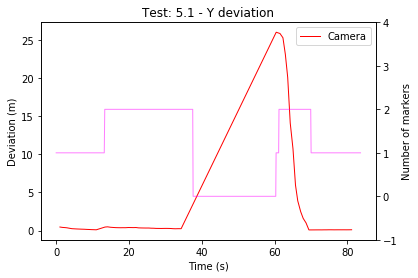

In [126]:
#plt.plot(data_amcl_laser_result["Time"],data_amcl_laser_result["Y deviation"], label='Scan2D', color = (0, 1, 0), linewidth = line_width)
plt.plot(data_amcl_RGB_result["Time"],data_amcl_RGB_result["Y deviation"], label='Camera', color = (1, 0, 0), linewidth = line_width)
#plt.plot(data_amcl_hybrid_result["Time"],data_amcl_hybrid_result["Y deviation"], label='Hybrid', color = (0, 0, 1), linewidth = line_width)
plt.ylabel("Deviation (m)")
plt.xlabel("Time (s)")
plt.legend()
plt2 = plt.twinx()
plt2.plot(data_amcl_RGB_numMarker["Time"], data_numMarker, label='Num Markers', color = coloNumMarker, linewidth = line_width)
plt2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt2.set_ylim(min_numMarker, max_numMarker)
plt.ylabel("Number of markers")
#plt2.legend(loc = 9)
plt.title("Test: " + str(test) + "." + str(simu) + " - Y deviation")
plt.savefig(path_folder + "g_Y_deviation.png")

In [128]:
###### mean #####
#mean_x_error_laser = round(data_amcl_laser_result["X position error"].abs().mean(), 3)
mean_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().mean(), 3)
#mean_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().mean(), 3)

#mean_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().mean(), 3)
mean_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().mean(), 3)
#mean_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().mean(), 3)

#mean_distance_error_laser = round(data_amcl_laser_result["Distance error"].mean(), 3)
mean_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].mean(), 3)
#mean_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].mean(), 3)

#mean_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().mean(), 3)
mean_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().mean(), 3)
#mean_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().mean(), 3)

#mean_x_deviation_laser = round(data_amcl_laser_result["X deviation"].mean(), 3)
mean_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].mean(), 3)
#mean_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].mean(), 3)

#mean_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].mean(), 3)
mean_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].mean(), 3)
#mean_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].mean(), 3)

######### max ######
#max_x_error_laser = round(data_amcl_laser_result["X position error"].abs().max(), 3)
max_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().max(), 3)
#max_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().max(), 3)

#max_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().max(), 3)
max_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().max(), 3)
#max_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().max(), 3)

#max_distance_error_laser = round(data_amcl_laser_result["Distance error"].max(), 3)
max_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].max(), 3)
#max_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].max(), 3)

#max_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().max(), 3)
max_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().max(), 3)
#max_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().max(), 3)

#max_x_deviation_laser = round(data_amcl_laser_result["X deviation"].max(), 3)
max_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].max(), 3)
#max_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].max(), 3)

#max_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].max(), 3)
max_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].max(), 3)
#max_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].max(), 3)

######### min ######
#min_x_error_laser = round(data_amcl_laser_result["X position error"].abs().min(), 3)
min_x_error_RGB = round(data_amcl_RGB_result["X position error"].abs().min(), 3)
#min_x_error_hybrid = round(data_amcl_hybrid_result["X position error"].abs().min(), 3)

#min_y_error_laser = round(data_amcl_laser_result["Y position error"].abs().min(), 3)
min_y_error_RGB = round(data_amcl_RGB_result["Y position error"].abs().min(), 3)
#min_y_error_hybrid = round(data_amcl_hybrid_result["Y position error"].abs().min(), 3)

#min_distance_error_laser = round(data_amcl_laser_result["Distance error"].min(), 3)
min_distance_error_RGB = round(data_amcl_RGB_result["Distance error"].min(), 3)
#min_distance_error_hybrid = round(data_amcl_hybrid_result["Distance error"].min(), 3)

#min_yaw_error_laser = round(data_amcl_laser_result["YAW error"].abs().min(), 3)
min_yaw_error_RGB = round(data_amcl_RGB_result["YAW error"].abs().min(), 3)
#min_yaw_error_hybrid = round(data_amcl_hybrid_result["YAW error"].abs().min(), 3)

#min_x_deviation_laser = round(data_amcl_laser_result["X deviation"].min(), 3)
min_x_deviation_RGB = round(data_amcl_RGB_result["X deviation"].min(), 3)
#min_x_deviation_hybrid = round(data_amcl_hybrid_result["X deviation"].min(), 3)

#min_y_deviation_laser = round(data_amcl_laser_result["Y deviation"].min(), 3)
min_y_deviation_RGB = round(data_amcl_RGB_result["Y deviation"].min(), 3)
#min_y_deviation_hybrid = round(data_amcl_hybrid_result["Y deviation"].min(), 3)

save_file_RGB = path_folder + "zzz_result_marker.txt"
comparative_RGB = open(save_file_RGB, "w")
comparative_RGB.write("mean X error,mean Y error,mean Distance error,mean YAW error,mean X deviation,mean Y deviation")
comparative_RGB.write(",max X error,max Y error,max Distance error,max YAW error,max X deviation,max Y deviation")
comparative_RGB.write(",min X error,min Y error,min Distance error,min YAW error,min X deviation,min Y deviation\n")
comparative_RGB.write(str(mean_x_error_RGB) + ",")
comparative_RGB.write(str(mean_y_error_RGB) + ",")
comparative_RGB.write(str(mean_distance_error_RGB) + ",")
comparative_RGB.write(str(mean_yaw_error_RGB) + ",")
comparative_RGB.write(str(mean_x_deviation_RGB) + ",")
comparative_RGB.write(str(mean_y_deviation_RGB) + ",")

comparative_RGB.write(str(max_x_error_RGB) + ",")
comparative_RGB.write(str(max_y_error_RGB) + ",")
comparative_RGB.write(str(max_distance_error_RGB) + ",")
comparative_RGB.write(str(max_yaw_error_RGB) + ",")
comparative_RGB.write(str(max_x_deviation_RGB) + ",")
comparative_RGB.write(str(max_y_deviation_RGB) + ",")

comparative_RGB.write(str(min_x_error_RGB) + ",")
comparative_RGB.write(str(min_y_error_RGB) + ",")
comparative_RGB.write(str(min_distance_error_RGB) + ",")
comparative_RGB.write(str(min_yaw_error_RGB) + ",")
comparative_RGB.write(str(min_x_deviation_RGB) + ",")
comparative_RGB.write(str(min_y_deviation_RGB))
comparative_RGB.close()


In [129]:
min_y_deviation_hybrid

NameError: name 'min_y_deviation_hybrid' is not defined